In [51]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = os.path.join('data','mouse_drug_data.csv')
clinical_trial_data_to_load = os.path.join('data','clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset on Mouse ID and merge left.
df_merged = pd.merge(df_clinical_data, df_mouse_data, on='Mouse ID', how='left')

# Display the data table for preview
df_merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [58]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint.
avg_tumor_volume = df_merged.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
df_avg_tumor_volume = avg_tumor_volume.mean()

# Convert to DataFrame.
df_avg_tumor_volume = df_avg_tumor_volume.reset_index()

# Preview DataFrame
df_avg_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [60]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint.
avg_tumor_volume_stderror = avg_tumor_volume.sem()

# Convert to DataFrame
df_avg_tumor_volume_stderror = pd.DataFrame(avg_tumor_volume_stderror)

# Preview DataFrame
df_avg_tumor_volume_stderror.reset_index(inplace=True)
df_avg_tumor_volume_stderror.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [62]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_avg_tumorvolume = df_avg_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df_pivot_avg_tumorvolume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


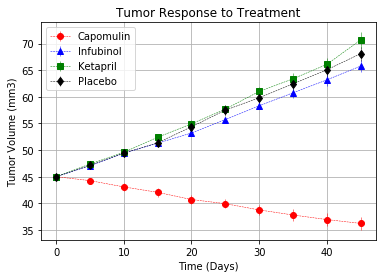

In [81]:
# Generate the Plot (with Error Bars)
drug_format = [('Capomulin','o','red'),('Infubinol','^','blue'),
                           ('Ketapril','s','green'),('Placebo','d','black')]

for drug, marker, color in drug_format:
    ste = avg_tumor_volume_stderror[drug]
    tumor_response_plt = plt.errorbar(df_pivot_avg_tumorvolume.index,
                                      df_pivot_avg_tumorvolume[drug], ste, fmt=marker,
                                      ls='--', color= color, linewidth=0.5)

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig('Images/Tumor_Response_to_Treatment.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [76]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_met = df_merged.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
df_avg_met = avg_met.mean()

# Convert to DataFrame
df_avg_met = df_avg_met.reset_index()

# Preview DataFrame
df_avg_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [79]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
avg_met_stderror = avg_met.sem()

# Convert to DataFrame
df_avg_met_stderror = pd.DataFrame(avg_met_stderror)

# Preview DataFrame
df_avg_met_stderror.reset_index(inplace=True)
df_avg_met_stderror.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [80]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_avg_met = df_avg_met.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
df_pivot_avg_met

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


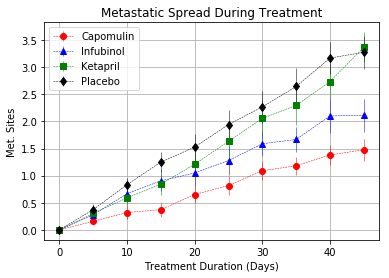

In [84]:
# Generate the Plot (with Error Bars)
for drug, marker, color in drug_format:
    ste = avg_met_stderror[drug]
    met_treatment_plt = plt.errorbar(df_pivot_avg_met.index,
                                    df_pivot_avg_met[drug], ste, fmt=marker,
                                    ls='--', color=color, linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig('Images/Metastatic_Spread_During_Treatment.png')

plt.show()

## Survival Rates

In [86]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mice_gb = df_merged.groupby(['Drug', 'Timepoint'])['Mouse ID']
df_count_mice = df_mice_gb.nunique()

# Convert to DataFrame
df_count_mice = pd.DataFrame(df_count_mice)
df_count_mice.reset_index(inplace=True)
df_count_mice = df_count_mice.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
df_count_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

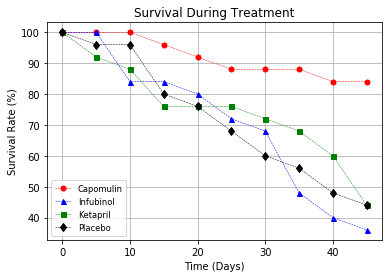

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

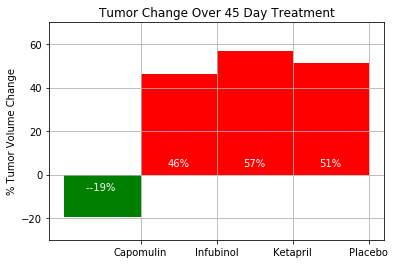